In [43]:
import pandas as pd 
import numpy as np
import json
import os 
import matplotlib.pyplot as plt
import requests
%matplotlib inline



In [44]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive = df_archive[df_archive['retweeted_status_id'].isnull()]
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [45]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1] ,mode = 'wb') as file:
    file.write(response.content)
df_img = pd.read_csv('image-predictions.tsv', sep = '\t')
df_img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [46]:
lists =[]
with open('tweet_json.txt' , 'r') as outfile:
    for line in outfile:
        tweet = json.loads(line)
        lists.append(tweet)
lists[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [47]:
df_tweet_json = pd.DataFrame()
df_tweet_json['tweet_id'] = list(map(lambda x: x['id'],lists))
df_tweet_json['retweet_count'] = list(map(lambda x: x['retweet_count'],lists))
df_tweet_json['favorite_count'] = list(map(lambda x: x['favorite_count'],lists))

In [48]:
df_tweet_json.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [49]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Assess Data
### tidiness
- Columns 'doggo', 'floofer', 'pupper', 'puppo' in df_archive should belong to one colomn -- stage
- The df_tweet_json table need to merge into the df_archive table.

### Quality

#### df_archive Table

- Some columns have huge amount of missing values, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". Since I don't need in_reply and retweet data in this project, I perfer to delete those columns directly.
- The varaible "expanded_urls" also has few missing values, which means some records had no images. Any ratings without images should not be taking into account.
- The datatype of "timestamp" is not correct.
- change the long url links to certain words.
- The standard for "rating_denominator" is 10, but it includes some other numbers
- The "rating_numerator" also has some incorrect values
- incorrect dog names (a, an, the, just, one, very, quite, not, actually, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such)
- The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent


#### df_img Table

- The columns'names are not clear and straightforward such as p1,p2
- The prediction dog breeds involve both uppercase and lowercase for the first letter

#### in three tables 
- Tweet_id int64 , it should be str

# Clean Data 

In [50]:
twitter_archive_clean = df_archive.copy()
image_predictions_clean = df_img.copy()
tweet_json_clean = df_tweet_json.copy()

## df_archive Table
##### Tidiness 1  
- Define : Create a new column "Stage" to show 4-dog stages ,drop 4-columns and then fill empty with NaN


- Code

In [51]:
twitter_archive_clean.doggo.replace('None','',inplace = True)
twitter_archive_clean.floofer.replace('None','',inplace = True)
twitter_archive_clean.pupper.replace('None','',inplace = True)
twitter_archive_clean.puppo.replace('None','',inplace = True)

twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo


twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper','stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo','stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer','stage'] = 'doggo, floofer'

twitter_archive_clean.loc[twitter_archive_clean.stage == '', 'stage'] = np.nan
twitter_archive_clean.stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

- Test

In [52]:
twitter_archive_clean.stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

##### Tidiness 2 
- Define : Merge df_tweet_json to df_archive using inner merge on tweet_id


- Code

In [53]:
twitter_archive_clean = pd.merge(twitter_archive_clean,tweet_json_clean , on = 'tweet_id',how='inner')


- Test

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                         344 non-

### df_archive Table

##### Quality 1 :  Define 
- Remove all columns That unnecessary like  ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id')


- Code

In [55]:
twitter_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
stage                         1831
retweet_count                    0
favorite_count                   0
dtype: int64

In [56]:
drop_col =['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']
twitter_archive_clean = twitter_archive_clean.drop(drop_col , axis = 1)


In [57]:
twitter_archive_clean.expanded_urls.isnull().sum()

58

##### Quality 2 :
- Remove the records with no images information ('expanded_urls' is NaN)

In [58]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

In [59]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
stage                 338 non-null object
retweet_count         2117 non-null int64
favorite_count        2117 non-null int64
dtypes: int64(5), object(10)
memory usage: 264.6+ KB


##### Quality 3 :
-  Change the datatype of 'timestamp' to datetime

In [60]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
stage                 338 non-null object
retweet_count         2117 non-null int64
favorite_count        2117 non-null int64
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 264.6+ KB


##### Quality 4 : 
-  Optimize the source content by ‘Twitter for iphone’, ‘Vine - Make a Scene’, ‘Twitter Web Client’, and ‘TweetDeck’. and then change the source Datatype to category

In [62]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [63]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')


In [64]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

In [65]:
twitter_archive_clean['source'].value_counts()

Twitter for iphone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [66]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null category
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
stage                 338 non-null object
retweet_count         2117 non-null int64
favorite_count        2117 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(8)
memory usage: 250.3+ KB


##### Quality 5 :
- correct the wrong values of rating_denumerator based on the corresponding text information. which is default by 10.

In [67]:
twitter_archive_clean.rating_denominator.value_counts()

10     2099
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [68]:
df_denominator = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]
df_denominator[['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
363,820690176645140481,The floofs have been released I repeat the flo...,84,70
429,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
733,758467244762497024,Why does this never happen at my front door......,165,150
890,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
942,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
987,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1024,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1050,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1075,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1095,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [69]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==740373189193256964 ,['rating_denominator'] ] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==666287406224695296 ,['rating_denominator'] ] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==716439118184652801 ,['rating_denominator'] ] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==775096608509886464 ,['rating_denominator'] ] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==682962037429899265 ,['rating_denominator'] ] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==722974582966214656 ,['rating_denominator'] ] = 10

- 740373189193256964 = 14/10
- 666287406224695296 = 9/10
- 716439118184652801 = 11/10
- 775096608509886464 = 14/10
- 682962037429899265 = 10/10
- 722974582966214656 = 13/10


In [70]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,retweet_count,favorite_count
890,740373189193256964,2016-06-08 02:41:38,Twitter for iphone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,10,None,,,,,NaN,9220,20648


##### Quality 6 : 
- Correct the 'rating_numerator' values from the text information

In [71]:

twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==740373189193256964 ,['rating_numerator'] ] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==666287406224695296 ,['rating_numerator'] ] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==716439118184652801 ,['rating_numerator'] ] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==775096608509886464 ,['rating_numerator'] ] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==682962037429899265 ,['rating_numerator'] ] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id ==722974582966214656 ,['rating_numerator'] ] = 13

##### Quality 7 :
- Replace incorrect dog names to None like  (a, an, the, just, one, very, quite, not, actually, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such)

In [72]:
twitter_archive_clean.name.value_counts()

None          622
a              55
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Tucker          9
Penny           9
the             8
Lola            8
Winston         8
Sadie           8
Toby            7
Daisy           7
Bella           6
Stanley         6
an              6
Oscar           6
Bailey          6
Bo              6
Jax             6
Koda            6
Chester         5
Milo            5
Rusty           5
Dave            5
Leo             5
Scout           5
Buddy           5
Bentley         5
             ... 
Chuck           1
Joshwa          1
Zara            1
officially      1
Bloop           1
Adele           1
Barclay         1
Zeus            1
Schnitzel       1
Timison         1
Jameson         1
Sprinkles       1
Tyrus           1
incredibly      1
Hero            1
Sonny           1
Sweets          1
Traviss         1
Chesney         1
Gòrdón          1
Kuyu            1
Grady           1
Duddles         1
Creg            1
Beebop    

In [73]:
unacceptable_names = ['a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life', 'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']
for i in unacceptable_names:
    twitter_archive_clean.name.replace(i,'None',inplace = True)

In [74]:
twitter_archive_clean.name.value_counts()

None         721
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Bailey         6
Jax            6
Oscar          6
Stanley        6
Bo             6
Bella          6
Koda           6
Milo           5
Leo            5
Rusty          5
Dave           5
Louis          5
Scout          5
Bentley        5
Chester        5
Buddy          5
Archie         4
Oakley         4
            ... 
Joshwa         1
Zara           1
Dotsy          1
Saydee         1
Timber         1
Adele          1
BeBe           1
Barclay        1
Schnitzel      1
Timison        1
Jameson        1
Sprinkles      1
Tyrus          1
Hero           1
Sonny          1
Sweets         1
Traviss        1
Mojo           1
Gòrdón         1
Kuyu           1
Grady          1
Duddles        1
Creg           1
Beebop         1
Herschel       1
Shawwn         1
Izzy           1
Rumpole       

##### Quality 8 : 
- Capitalize the first letter of dog name 

In [75]:
twitter_archive_clean.name = twitter_archive_clean.name.str.capitalize()

In [76]:
twitter_archive_clean.name.str.islower().sum()

0

### df_img Table

##### Quality 9 : 
-  Change the column names to be readability

In [77]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [78]:
image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [79]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Quality 10 : 
- Capitalize the first letter of first prediction (I could do that for all the predictions, but I decide to only apply to the first prediction since this variable is the important one).

In [80]:
image_predictions_clean.first_prediction = image_predictions_clean.first_prediction.str.capitalize()

In [81]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null category
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
stage                 338 non-null object
retweet_count         2117 non-null int64
favorite_count        2117 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(8)
memory usage: 250.3+ KB


In [82]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null int64
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null object
first_confidence     2075 non-null float64
first_dog            2075 non-null bool
second_prediction    2075 non-null object
second_confidence    2075 non-null float64
second_dog           2075 non-null bool
third_prediction     2075 non-null object
third_confidence     2075 non-null float64
third_dog            2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [83]:
# merge twitter_archive_clean with image_predictions_clean
twitter_archive_clean = pd.merge(twitter_archive_clean,image_predictions_clean , on = 'tweet_id' , how = 'outer')

In [84]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 2197
Data columns (total 26 columns):
tweet_id              2198 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null category
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
stage                 338 non-null object
retweet_count         2117 non-null float64
favorite_count        2117 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
first_prediction      2075 non-null object
first_confidence      2075 non-null float64
first_dog             2075 non-null object
second_prediction  

In [85]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

In [86]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 2197
Data columns (total 26 columns):
tweet_id              2198 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null category
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
stage                 338 non-null object
retweet_count         2117 non-null float64
favorite_count        2117 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
first_prediction      2075 non-null object
first_confidence      2075 non-null float64
first_dog             2075 non-null object
second_prediction 

### Store Data 

In [87]:
twitter_archive_clean.to_csv('twitter_archive_master.csv' , index = False)

In [88]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.source = twitter_archive_master.source.astype('category')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 26 columns):
tweet_id              2198 non-null int64
timestamp             2117 non-null object
source                2117 non-null category
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  2117 non-null object
doggo                 84 non-null object
floofer               10 non-null object
pupper                232 non-null object
puppo                 24 non-null object
stage                 338 non-null object
retweet_count         2117 non-null float64
favorite_count        2117 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
first_prediction      2075 non-null object
first_confidence      2075 non-null float64
first_dog             2075 non-null object
second_prediction     2075 non-nul

## Visualize & Analyze

# 1st Insight :

## Distribution Of Source


Twitter for iphone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64


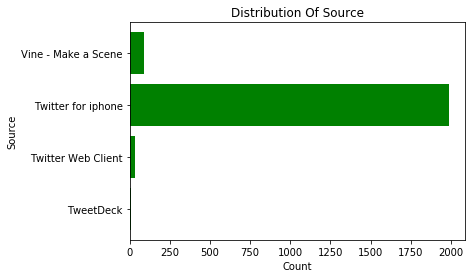

In [89]:
print(twitter_archive_master.source.value_counts())
x_data = twitter_archive_master.source.value_counts().index

y_data = twitter_archive_master.source.value_counts().values

plt.barh(x_data ,y_data,color = 'g')
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Distribution Of Source');

- in the previous figure we can see that the dominate source of tweets is from iphone twitter app .

# 2nd insight

## Dog Stages Distribution

pupper            222
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64


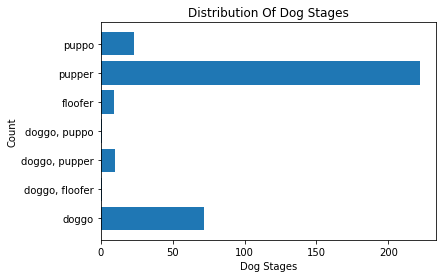

In [92]:
x_data = twitter_archive_master.stage.value_counts().index
y_data = twitter_archive_master.stage.value_counts().values
print(twitter_archive_master.stage.value_counts())
plt.barh(x_data,y_data)
plt.xlabel('Dog Stages')
plt.ylabel('Count')
plt.title('Distribution Of Dog Stages');

- This Shows that 'pupper'  is the most popular dog stage, followed by ‘doggo’ , ‘puppo’ and 'floofer'.It should also be noticed that there’s huge amount missing data in dog stages, thus the distribution may not reflect the truth.

                retweet_count  favorite_count
retweet_count         1.00000         0.91114
favorite_count        0.91114         1.00000


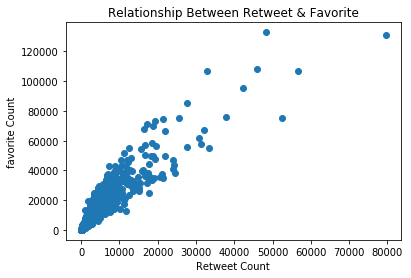

In [91]:
print(twitter_archive_master[['retweet_count','favorite_count']].corr())
x = twitter_archive_master.retweet_count
y = twitter_archive_master.favorite_count
plt.scatter(x,y)
plt.xlabel('Retweet Count')
plt.ylabel('favorite Count')
plt.title('Relationship Between Retweet & Favorite');

- the previous scatter shows the strong positive relationship between retweet_count and favorite_count